In [10]:
#writing some conda package or module
#!pip install netCDF4
%matplotlib inline
import warnings
from netCDF4 import Dataset
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
#!pip install cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

In [11]:
rain_minimum = 1.0
rain_maximum = 250.0
rain_step = 1.0
spd = 86400.0
sph = 3600.0
mpy = 30.4167

nrainbin = int((rain_maximum-rain_minimum)/rain_step) + 1

rain_pdf = np.linspace(rain_minimum,rain_maximum, num=nrainbin, endpoint=True)
rain_bin = np.zeros((nrainbin-1))


In [12]:

pr = xr.load_dataset('/home/mkibria/Academic/pr_of_thesis/GCM/MPI-ESM-MR/pr_Amon_MPI-ESM-MR_historical_r1i1p1_185001-200512.nc')

pr




<xarray.Dataset>
Dimensions:    (time: 1872, bnds: 2, lat: 96, lon: 192)
Coordinates:
  * time       (time) datetime64[ns] 1850-01-16T12:00:00 ... 2005-12-16T12:00:00
  * lat        (lat) float64 -88.57 -86.72 -84.86 -83.0 ... 84.86 86.72 88.57
  * lon        (lon) float64 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 1850-01-01 1850-02-01 ... 2006-01-01
    lat_bnds   (lat, bnds) float64 -90.0 -87.65 -87.65 ... 87.65 87.65 90.0
    lon_bnds   (lon, bnds) float64 -0.9375 0.9375 0.9375 ... 357.2 357.2 359.1
    pr         (time, lat, lon) float32 1.488e-06 1.492e-06 ... 6.684e-06
Attributes: (12/27)
    institution:            Max Planck Institute for Meteorology
    institute_id:           MPI-M
    experiment_id:          historical
    source:                 MPI-ESM-MR 2011; URL: http://svn.zmaw.de/svn/cosm...
    model_id:               MPI-ESM-MR
    forcing:                GHG,Oz,SD,Sl,Vl,LU
    ...                     ...
    table_id:               Table Amon (27 April 2011) a5a1c518f52ae340313ba0...
    title:                  MPI-ESM-MR model output prepared for CMIP5 histor...
    parent_experiment:      N/A
    modeling_realm:         atmos
    realization:            1
    cmor_version:           2.6.0

In [13]:
pr = pr.sel(time=slice('1980-01-16T12:00:00.000000000','2005-12-16T00:00:00.000000000'))


In [14]:
pr= pr.sel(lon=slice(86,94),lat=slice(18,27))
pr

<xarray.Dataset>
Dimensions:    (time: 311, bnds: 2, lat: 4, lon: 5)
Coordinates:
  * time       (time) datetime64[ns] 1980-01-16T12:00:00 ... 2005-11-16
  * lat        (lat) float64 19.59 21.45 23.32 25.18
  * lon        (lon) float64 86.25 88.12 90.0 91.88 93.75
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 1980-01-01 1980-02-01 ... 2005-12-01
    lat_bnds   (lat, bnds) float64 18.65 20.52 20.52 22.38 ... 24.25 24.25 26.11
    lon_bnds   (lon, bnds) float64 85.31 87.19 87.19 89.06 ... 92.81 92.81 94.69
    pr         (time, lat, lon) float32 2.022e-05 2.878e-05 ... 1.556e-18
Attributes: (12/27)
    institution:            Max Planck Institute for Meteorology
    institute_id:           MPI-M
    experiment_id:          historical
    source:                 MPI-ESM-MR 2011; URL: http://svn.zmaw.de/svn/cosm...
    model_id:               MPI-ESM-MR
    forcing:                GHG,Oz,SD,Sl,Vl,LU
    ...                     ...
    table_id:               Table Amon (27 April 2011) a5a1c518f52ae340313ba0...
    title:                  MPI-ESM-MR model output prepared for CMIP5 histor...
    parent_experiment:      N/A
    modeling_realm:         atmos
    realization:            1
    cmor_version:           2.6.0

In [15]:

#interpolating to new lat and lon

#new_lon = np.arange(85,94,0.5)
#new_lat = np.arange(17,28,0.5)
#pr = pr.interp(latitude=new_lat,longitude=new_lon)
#pr


In [16]:
size = pr.pr.shape
print(size)


(311, 4, 5)


In [17]:
for time in range(size[0]):
        data = pr.pr[time,Ellipsis] * spd
        nzd  = data.values[tuple(np.where(data >= rain_minimum))]
        hist = np.histogram(nzd,
                            bins = nrainbin-1,
                            range = (rain_minimum, rain_maximum))
        rain_bin = rain_bin + hist[0]

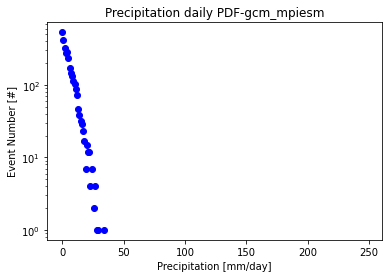

In [18]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(rain_bin, 'bo')
ax.set_yscale('log')
#ax.set_xscale('log')
plt.xlabel('Precipitation [mm/day]')
plt.ylabel('Event Number [#]')
plt.title('Precipitation daily PDF-gcm_mpiesm')
plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/pdf_gcm_mpiesm.png")



plt.show( )